In [1]:
import numpy as np
import matplotlib.pyplot as plt
import main_urnings as mu
import pandas as pd

In [2]:
df = pd.read_csv("df0507.csv")

player_ids = df.iloc[:,2].to_numpy()
item_ids = df.iloc[:,3].to_numpy()
correct_answers = df.iloc[:,5].to_numpy()


correct_answers.shape


(3065222,)

In [3]:
data = mu.AlsData(player_ids, item_ids, correct_answers)

players_nochange, items_nochange, ppunch, ipunch  = data.create_players_items(player_starting_score=32,item_starting_score=32,player_urn_size=64,item_urn_size=64, so_urn_size=10)
data.makeQueueFromPunchcard()

In [4]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=False, adaptive_urn=False, adaptive_urn_type="second_order_urnings", window=15, min_urn=8, max_urn=32, permutation_test=True, perm_p_val=0.1)
nochange = mu.Urnings(players = players_nochange, items = items_nochange, game_type=adaptive_rule, data=data)
nochange.play(n_games=None, test = False)


In [5]:
data = mu.AlsData(player_ids, item_ids, correct_answers)
players_sourn, items_sourn, ppunch, ipunch  = data.create_players_items(player_starting_score=4,item_starting_score=32,player_urn_size=8,item_urn_size=64, so_urn_size=15)
data.makeQueueFromPunchcard()
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=False, adaptive_urn=True, adaptive_urn_type="second_order_urnings", window=10, min_urn=8, max_urn=64, permutation_test=True, perm_p_val=0.1)
sourn = mu.Urnings(players = players_sourn, items = items_sourn, game_type=adaptive_rule, data=data)
sourn.play(n_games=None, test = False)

In [14]:
players_perm, items_perm, ppunch, ipunch  = data.create_players_items(player_starting_score=4,item_starting_score=32,player_urn_size=8,item_urn_size=64, so_urn_size=20)
data.makeQueueFromPunchcard()
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=False, adaptive_urn=True, adaptive_urn_type="permutation", window=15, min_urn=8, max_urn=64, permutation_test=True, perm_p_val=0.2)
perm = mu.Urnings(players = players_perm, items = items_perm, game_type=adaptive_rule, data=data)
perm.play(n_games=None, test = False)

551


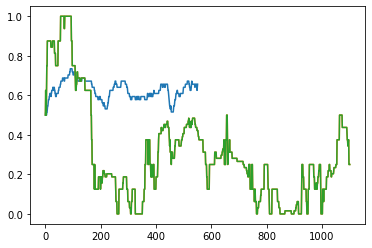

In [52]:
id = 10
plt.plot(players_nochange[id].estimate_container)
plt.plot(players_sourn[id].estimate_container)
plt.plot(players_perm[id].estimate_container)

print(len(players_nochange[10].estimate_container))

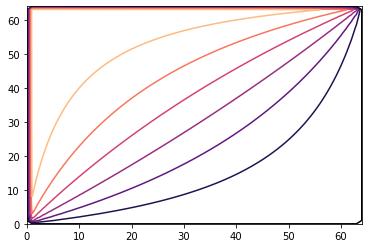

In [53]:
true_matrix = np.zeros((65,65))

def BTL_process(r_i, r_j, n_i, n_j):
    return (r_i/n_i * (1 - r_j/n_j)) / (r_i/n_i * (1 -  r_j/n_j) + r_j/n_j * (1 - r_i/n_i))

for i in range(1,true_matrix.shape[0]-1):
    for j in range(1,true_matrix.shape[1]-1):
        true_matrix[i,j] = BTL_process(i,j,64,64)

plt.contour(true_matrix, cmap = "magma")


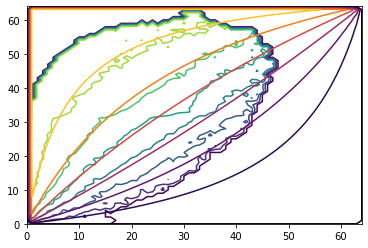

In [56]:
contour = np.zeros(nochange.prop_correct.shape)

for i in range(contour.shape[0]):
    for j in range(contour.shape[1]):
        if nochange.number_per_bin[i,j] < 40:
            contour[i,j] = 0
        else:
            contour[i,j] = nochange.prop_correct[i,j] / nochange.number_per_bin[i,j]

#plt.contour(contour)


contourT = np.zeros(nochange.prop_correct.shape)
for i in range(contourT.shape[0]):
    for j in range(contourT.shape[1]):
        if nochange.number_per_bin[i,j] < 10:
            contourT[i,j] = 0
        else:
            contourT[i,j] = nochange.fit_correct[i,j] / nochange.number_per_bin[i,j]

plt.contour(contour)
plt.contour(true_matrix, cmap = "inferno")

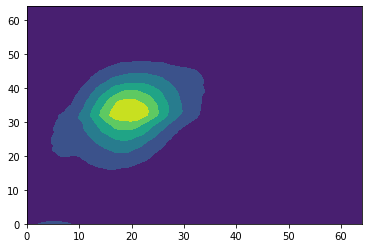

In [9]:
plt.contourf(nochange.number_per_bin)

(65, 65)


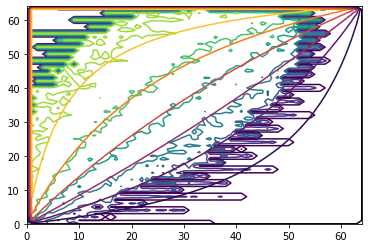

In [60]:
contour = np.zeros(sourn.prop_correct.shape)
print(contour.shape)

for i in range(contour.shape[0]):
    for j in range(contour.shape[1]):
        if sourn.number_per_bin[i,j] < 30:
            contour[i,j] = 0
        else:
            contour[i,j] = sourn.prop_correct[i,j] / sourn.number_per_bin[i,j]

#plt.contour(contour)


contourT = np.zeros(sourn.prop_correct.shape)
for i in range(contourT.shape[0]):
    for j in range(contourT.shape[1]):
        if sourn.number_per_bin[i,j] < 10:
            contourT[i,j] = 0
        else:
            contourT[i,j] = sourn.fit_correct[i,j] / sourn.number_per_bin[i,j]

plt.contour(contour)
plt.contour(true_matrix, cmap = "inferno")

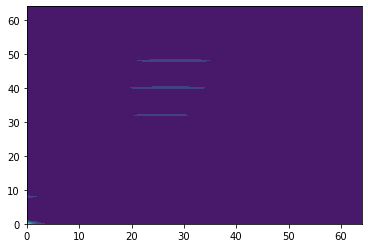

In [13]:
plt.contourf(sourn.number_per_bin)

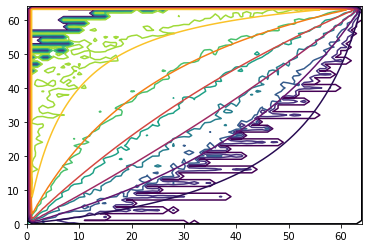

In [58]:
contour = np.zeros(perm.prop_correct.shape)

for i in range(contour.shape[0]):
    for j in range(contour.shape[1]):
        if perm.number_per_bin[i,j] < 40:
            contour[i,j] = 0
        else:
            contour[i,j] = perm.prop_correct[i,j] / perm.number_per_bin[i,j]

#plt.contour(contour)


contourT = np.zeros(nochange.prop_correct.shape)
for i in range(contourT.shape[0]):
    for j in range(contourT.shape[1]):
        if perm.number_per_bin[i,j] < 10:
            contourT[i,j] = 0
        else:
            contourT[i,j] = perm.fit_correct[i,j] / perm.number_per_bin[i,j]

plt.contour(contour)
plt.contour(true_matrix, cmap = "inferno")